In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data= pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
data.dropna(inplace=True)

In [4]:
x=data.drop('PM 2.5', axis=1)

In [5]:
y= data['PM 2.5']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtr,xte,ytr,yte= train_test_split(x,y,test_size=0.3)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [9]:
# Performing Linear regression with cross validation
linreg= LinearRegression()
mse= cross_val_score(linreg, x,y,scoring='neg_mean_squared_error',cv=5)
mse=mse.mean()
mse

-3686.2017773398848

In [10]:
# Performing Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [11]:
ridge= Ridge()
param={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,60,70,80,100]}
ridge_reg=GridSearchCV(ridge,param_grid=param,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(x,y)

c:\users\adrat\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 50, 60, 70, 80, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [12]:
ridge_reg.best_params_

{'alpha': 70}

In [13]:
ridge_reg.best_score_

-3659.9305417977325

In [14]:
ridgepred= ridge_reg.predict(xte)

In [15]:
ridgeloss= yte-ridgepred

c:\users\adrat\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


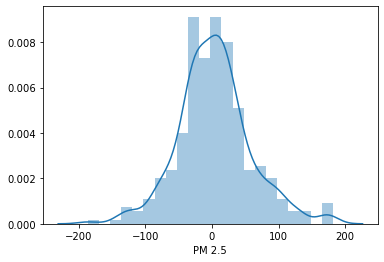

In [16]:
sns.distplot(ridgeloss)

In [17]:
import pickle

In [18]:
# Saving the model
file= open("ridgereg.pkl",'wb')
pickle.dump(ridge_reg,file)

In [19]:
# Performing lasso regression
from sklearn.linear_model import Lasso

In [20]:
lasso=Lasso()
lasso_reg= GridSearchCV(lasso,param_grid=param,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(x,y)

c:\users\adrat\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\adrat\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\adrat\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\adrat\appdata\local\programs\python\python37\lib\site-packages\skle

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 50, 60, 70, 80, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [21]:
lasso_reg.best_params_

{'alpha': 1}

In [22]:
lasso_reg.best_score_

-3665.663689110883

In [23]:
lassopred= lasso_reg.predict(xte)

In [24]:
lassoloss=yte-lassopred

c:\users\adrat\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


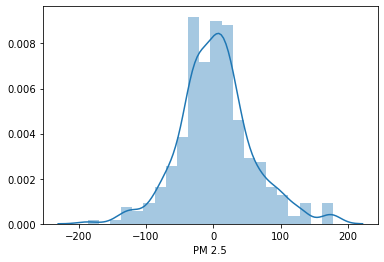

In [25]:
sns.distplot(lassoloss)

Since ridge regression gave the minimum MSE value among the vanilla regression, ridge and lasso, we are going to choose ridge reg here.

In [26]:
file= open("lassoreg.pkl",'wb')
pickle.dump(lasso_reg,file)